# Multiple Bar Charts

In [1]:
raw_data = {
    'sales_person': ['Vihan', 'Aric', 'Dilini', 'Saman', 'Anagi'],
    'jan_sales': [4, 24, 31, 2, 3],
    'feb_sales':[25, 94, 57, 62, 70],
    'march_sales': [5, 43, 23, 23, 51]
}

In [2]:
raw_data

{'feb_sales': [25, 94, 57, 62, 70],
 'jan_sales': [4, 24, 31, 2, 3],
 'march_sales': [5, 43, 23, 23, 51],
 'sales_person': ['Vihan', 'Aric', 'Dilini', 'Saman', 'Anagi']}

In [3]:
import pandas as pd
df = pd.DataFrame(raw_data)

In [4]:
df

,feb_sales,jan_sales,march_sales,sales_person
0,25,4,5,Vihan
1,94,24,43,Aric
2,57,31,23,Dilini
3,62,2,23,Saman
4,70,3,51,Anagi


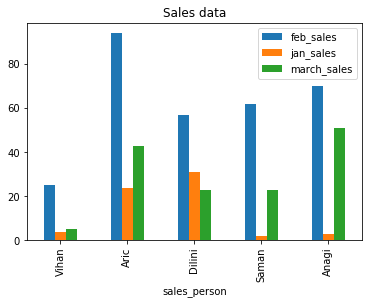

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
sales_plot = df.plot(
    kind = 'bar',
    x = df['sales_person'],
    title = "Sales data",
    legend = True
)

In [9]:
fig = sales_plot.get_figure()
fig.savefig('sales.png')

# Statistical Plots!

## Time series plots

In [ ]:
# last week's lecture

## Probability distributions

In [13]:
import numpy as np
df_hist = pd.DataFrame({'a': np.random.randn(1000)})

In [16]:
df_hist.head()

,a
0,0.179127
1,1.610025
2,-0.381309
3,-1.037710
4,-1.032510


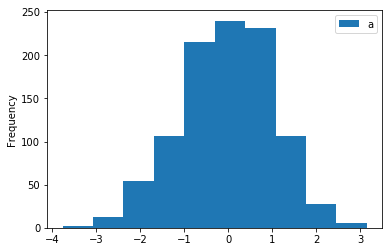

In [17]:
df_hist.plot.hist()

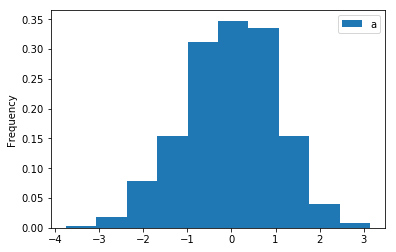

In [19]:
df_hist.plot(kind='hist', normed=True)

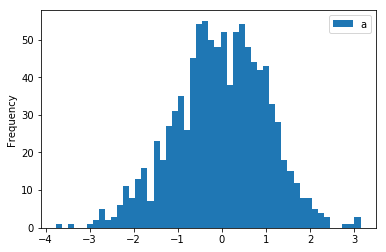

In [21]:
df_hist.plot(kind='hist', bins=50)

In [33]:
df_hist2 = pd.DataFrame({
    'a': np.random.randn(1000)+3,
    'b': np.random.exponential(1, 1000)
})

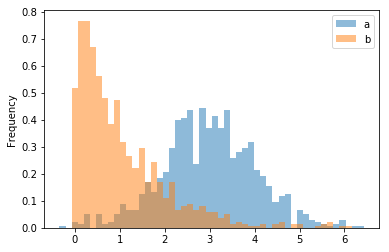

In [34]:
df_hist2.plot.hist(normed=True, bins=50, alpha=0.5)

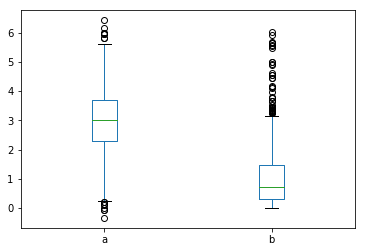

In [35]:
df_hist2.plot.box()

## Regression

In [50]:
import numpy as np
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
import math
%matplotlib inline

In [51]:
data = datasets.load_boston()
df = pd.DataFrame(
    data.data,
    columns=data.feature_names
)

In [52]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
# fitting the regression model
model = sm.OLS(df.MEDV, sm.add_constant(df.RM))
p = model.fit().params

In [59]:
print(p.const)
print(p.RM)

-34.6706207764
9.10210898118


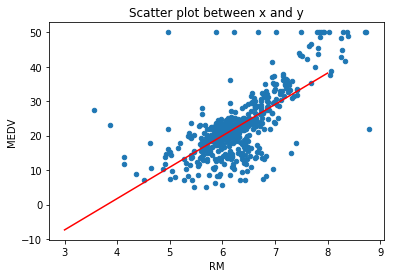

In [60]:
# scatter plot
ax = df.plot(x='RM', y='MEDV', kind='scatter', title='Scatter plot between x and y')

rm_min = math.floor(min(df.RM))
rm_max = math.ceil(max(df.RM))
x = range(rm_min, rm_max)
matplotlib_plot = ax.plot(x, p.const + p.RM*x, color='red')

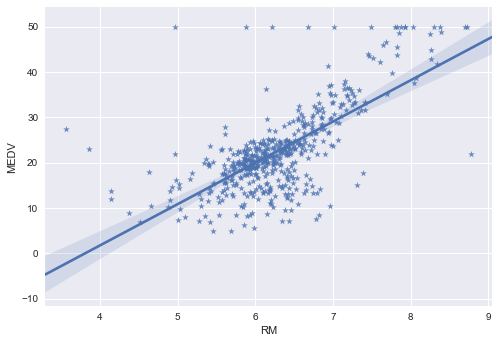

In [61]:
import seaborn as sns
sns.set(color_codes=True)
ax1 =  sns.regplot(x=df.RM, y=df.MEDV, marker='*')

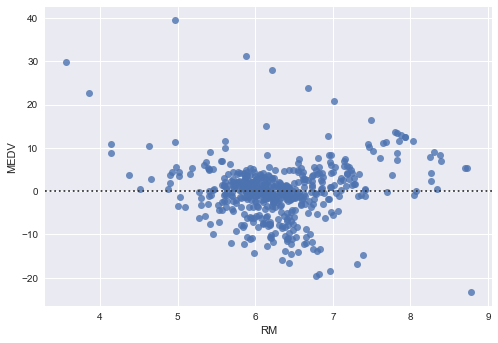

In [62]:
ax1 = sns.residplot(x=df.RM, y=df.MEDV)

In [63]:
df["age_cat"] = ['young' if i<45 else 'old' for i in df.AGE]

In [65]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,old
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,old


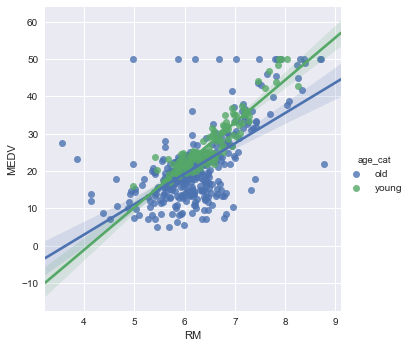

In [66]:
ax3 = sns.lmplot(x='RM', y='MEDV', hue='age_cat', data=df)

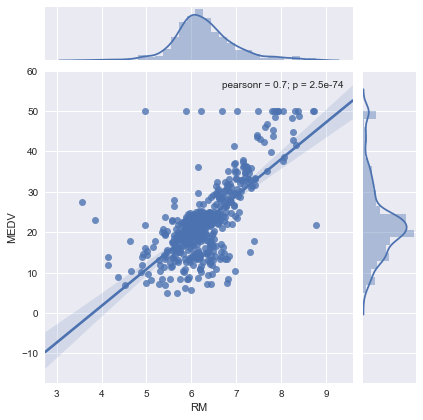

In [67]:
ax4 = sns.jointplot(x='RM', y='MEDV', data=df, kind='reg')

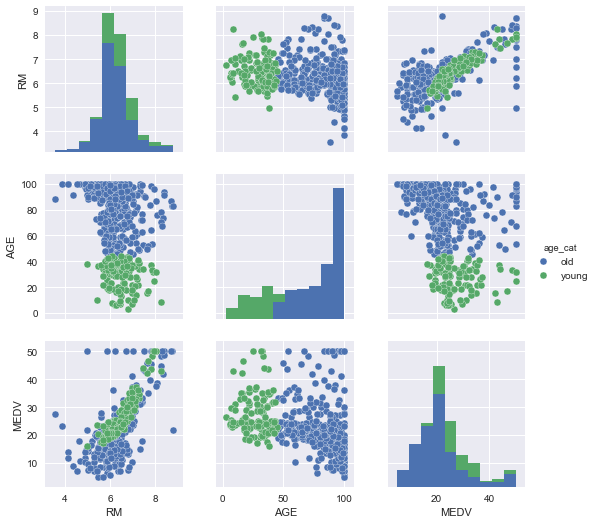

In [69]:
sns.pairplot(df, vars=['RM', 'AGE', 'MEDV'], hue='age_cat')

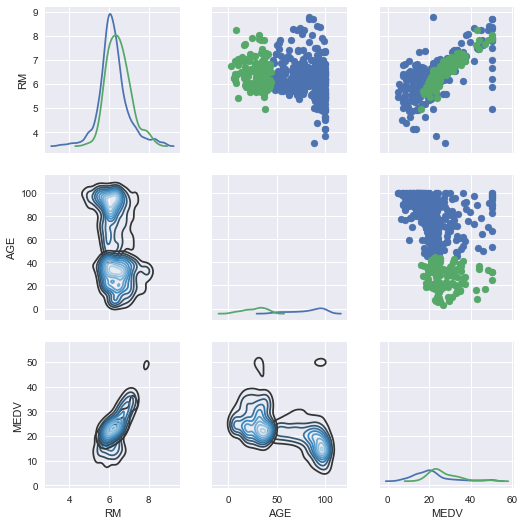

In [71]:
# different types of plots on a grid
g = sns.PairGrid(df, vars = ['RM', 'AGE', 'MEDV'], hue="age_cat")
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot)

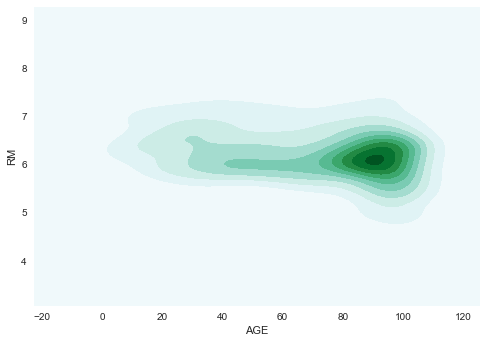

In [73]:
ax = sns.kdeplot(df.AGE, df.RM, shade = True)

## Heatmap

In [82]:
flights = sns.load_dataset('flights')

In [83]:
flights = flights.pivot('month', 'year', 'passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


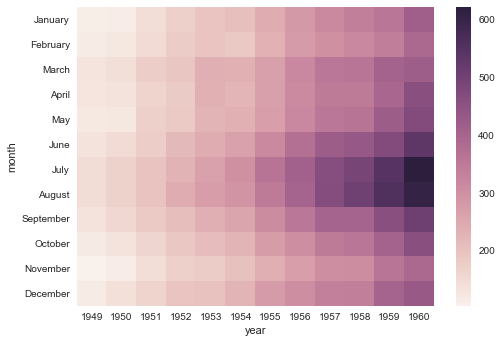

In [84]:
ax = sns.heatmap(flights)

## Widgets

In [86]:
from IPython.html.widgets import *

C:\Users\Vijini\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [93]:
speed = widgets.RadioButtons(
    options = ["fast", 'medium', 'slow'],
    description = 'How fast do you run?'
)
speed

In [92]:
speed.value

'medium'

In [97]:
from collections import Counter
Counter(df.age_cat)

Counter({'old': 380, 'young': 126})

In [99]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,old
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,old


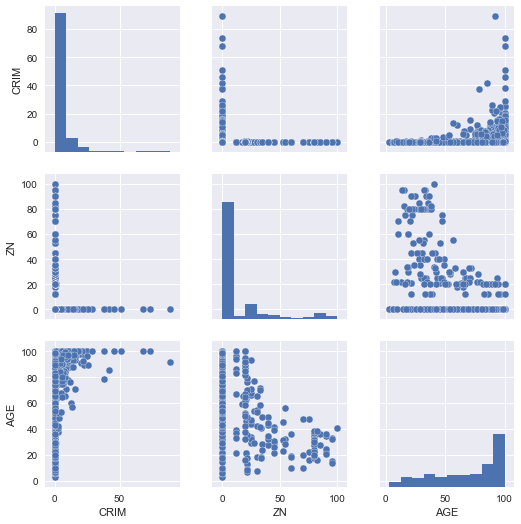

In [101]:
sns.pairplot(df, vars=['CRIM', 'ZN', 'AGE'])

In [103]:
df = pd.DataFrame({
    'year': [1900, 1980, 1970, 1922, 2007],
    'budget': [1232131,3233242,657655,67878,9767]
})

In [104]:
df

,budget,year
0,1232131,1900
1,3233242,1980
2,657655,1970
3,67878,1922
4,9767,2007


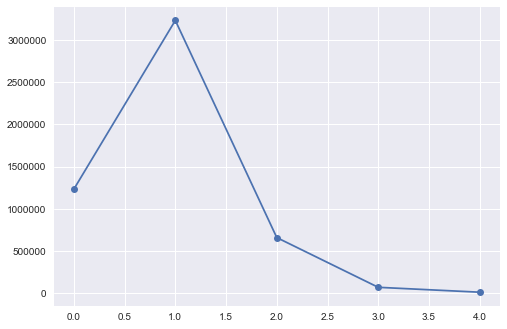

In [109]:
plt.plot(df['budget'], marker ='o')

In [139]:
import datetime
df.sort()
ts = pd.Series(
    data = list(df['budget']),
    index = [datetime.datetime(i, 1, 1) for i in df['year']]
)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [140]:
df.sort()

AttributeError: 'DataFrame' object has no attribute 'sort'